In [1]:
import pandas as pd

In [2]:
# This overrides how Colab displays Pandas Series.
#from google.colab import _reprs
#_reprs.disable_pandas_series_repr()

df = pd.read_csv("https://datasci112.stanford.edu/data/titanic.csv")
df

name  pclass  survived  \
0                       Allen, Miss. Elisabeth Walton       1         1   
1                      Allison, Master. Hudson Trevor       1         1   
2                        Allison, Miss. Helen Loraine       1         0   
3                Allison, Mr. Hudson Joshua Creighton       1         0   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1         0   
...                                               ...     ...       ...   
1304                             Zabour, Miss. Hileni       3         0   
1305                            Zabour, Miss. Thamine       3         0   
1306                        Zakarian, Mr. Mapriededer       3         0   
1307                              Zakarian, Mr. Ortin       3         0   
1308                               Zimmerman, Mr. Leo       3         0   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000      0      0   24160  211.3375       B5        S    2   
1       male   0.9167      1      2  113781  151.5500  C22 C26        S   11   
2     female   2.0000      1      2  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000      1      2  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000      1      2  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.5000      1      0    2665   14.4542      NaN        C  NaN   
1305  female      NaN      1      0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000      0      0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000      0      0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000      0      0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 14 columns]

In [3]:
df["pclass"].value_counts().sort_index()

pclass
1    323
2    277
3    709
Name: count, dtype: int64

<Axes: xlabel='pclass'>

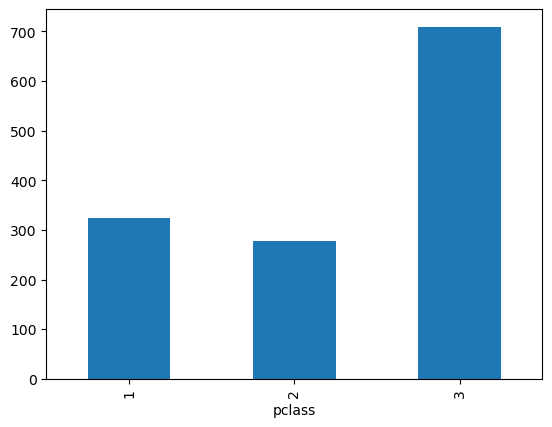

In [4]:
df["pclass"].value_counts().sort_index().plot.bar()

Two or More Categorical Variables
Note that we selected a single column by passing the column name as a key to the DataFrame. 
The result is a one-dimensional pandas object called a Series.

In [5]:
df["pclass"]

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

We can also select multiple columns by passing a list of column names as the key. 
The result is another DataFrame.

In [6]:
df[["pclass", "survived"]]

pclass  survived
0          1         1
1          1         1
2          1         0
3          1         0
4          1         0
...      ...       ...
1304       3         0
1305       3         0
1306       3         0
1307       3         0
1308       3         0

[1309 rows x 2 columns]

To summarize multiple categorical variables, we report the counts of every possible combination of categories.

We can use the .value_counts() method of DataFrame.

In [7]:
df[["pclass", "survived"]].value_counts()

pclass  survived
3       0           528
1       1           200
3       1           181
2       0           158
1       0           123
2       1           119
Name: count, dtype: int64

Let's make this information easier to read by arranging 
one variable along the rows and the other along the columns. 
This is called a crosstab.

In [8]:
(df[["pclass", "survived"]].value_counts().
 unstack())

survived    0    1
pclass            
1         123  200
2         158  119
3         528  181

From a crosstab, we can make a barplot to visualize the data.

<Axes: xlabel='survived'>

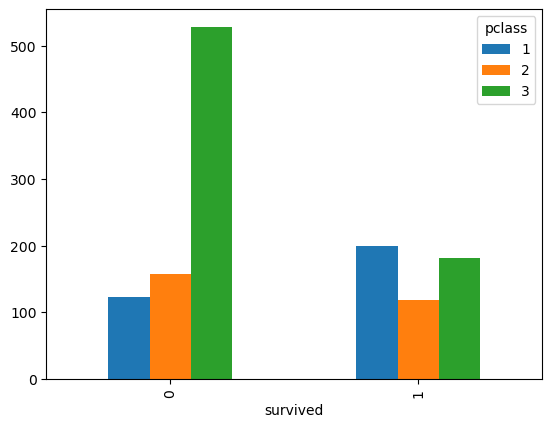

In [9]:
(df[["survived", "pclass"]].value_counts().
 unstack().
 plot.bar())

How could we recover the counts for each individual variable from a crosstab?

We could sum over the columns (across each row) to obtain the counts for pclass.

In [10]:
crosstab = df[["pclass", "survived"]].value_counts().unstack()
crosstab.sum(axis="columns")

pclass
1    323
2    277
3    709
dtype: int64

or sum over the rows (down each column) to obtain the counts for survived..

In [11]:
crosstab.sum(axis="rows")

survived
0    809
1    500
dtype: int64

Proportions and Probabilities
Instead of counts, it can be useful to report proportions, where we normalize by the total.

In [12]:
df["pclass"].value_counts() / len(df)

pclass
3    0.541635
1    0.246753
2    0.211612
Name: count, dtype: float64

Joint and Conditional Distributions

We can also calculate the distribution of multiple variables, called a joint distribution.

In [13]:
df[["pclass", "survived"]].value_counts().unstack() / len(df)

survived         0         1
pclass                      
1         0.093965  0.152788
2         0.120703  0.090909
3         0.403361  0.138273

<Axes: xlabel='pclass'>

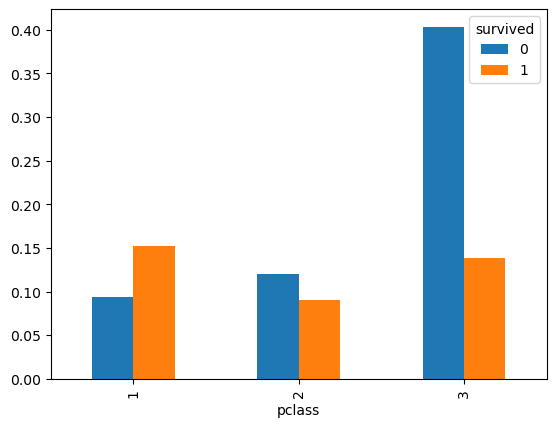

In [14]:
((df[["pclass", "survived"]].value_counts().unstack() / len(df)).
 plot.bar())

If we want to compare survival across the classes, we should divide by the total in each class.

In [15]:
crosstab = df[["pclass", "survived"]].value_counts().unstack()
pclass_marginal = crosstab.sum(axis="columns")
pclass_marginal

pclass
1    323
2    277
3    709
dtype: int64

In [16]:
pclass_marginal = crosstab.sum(axis="columns")
crosstab.divide(pclass_marginal, axis="rows")

survived         0         1
pclass                      
1         0.380805  0.619195
2         0.570397  0.429603
3         0.744711  0.255289

To visualize a conditional distribution, we can make a grouped bar plot...

<Axes: xlabel='pclass'>

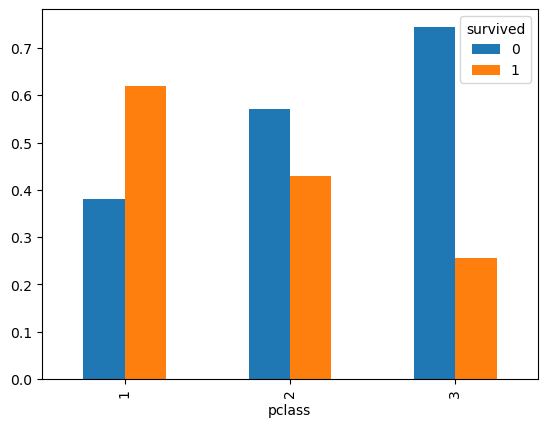

In [17]:
(crosstab.divide(pclass_marginal, axis="rows").
 plot.bar())

...but it is better to make a stacked bar plot.

<Axes: xlabel='pclass'>

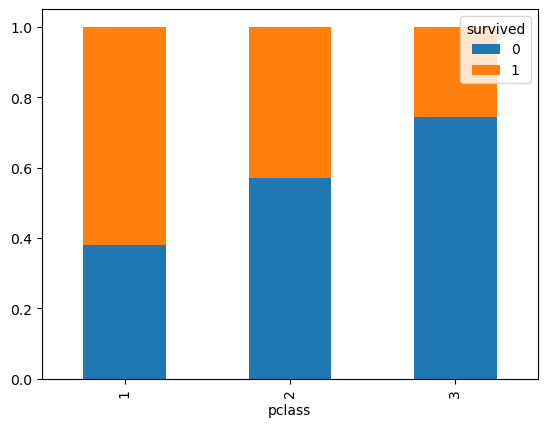

In [18]:
(crosstab.divide(pclass_marginal, axis="rows").
 plot.bar(stacked=True))